# 03 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `03_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_03` folder, in which you create another folder called `data`
4. Copy paste the notebook `03_Homework` from the lectures repo to the working-folder. Copy the csv files `movies.csv` and `movies_metadata.csv` into the `working-folder/Session_03/data` directory.
5. Do the exercises on 03_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 21st 08:59 am CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

In [2]:
import pandas as pd

## 1. Exploration and data cleaning (6 points)

**1.1. Read the dataset `movies.csv` and visualise it**

In [3]:
df = pd.read_csv('data/movies.csv')

In [4]:
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


**1.2 Display the size and the number of missing data points per column of the DataFrame**

In [5]:
df.shape

(9999, 9)

In [8]:
df.isna().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

**1.3 Fill the NaN and replace the original dataset**
- YEAR: 'Unknown'
- GENRE: 'Unknown'
- RATING: with the median value
- VOTES: 0

We leave the NaN of RunTime and Gross for now, as there is no straightforward way to fill them.

In [11]:
df.fillna({
    "YEAR": "Unknown",
    "GENRE": "Unknown",
    "RATING": df.RATING.median(),
    "VOTES": 0
}, inplace=True)

In [12]:
df.isna().sum()

MOVIES         0
YEAR           0
GENRE          0
RATING         0
ONE-LINE       0
STARS          0
VOTES          0
RunTime     2958
Gross       9539
dtype: int64

**1.4 Drop the duplicated rows**

In [13]:
df.drop_duplicates(inplace=True)

In [15]:
len(df)

9568

**1.5 Replace the columns names to make them all lowercase**

In [16]:
new_colnames = [colname.lower() for colname in df.columns]

In [18]:
df.columns = new_colnames

**1.6 Convert the `votes` column into a `float type`**

*Hint: the U.K. and U.S. use a comma to separate groups of thousands. You might need to remove this comma first before converting the numbers*

In [20]:
df['votes'] = df['votes'].str.replace(",", "").astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9568 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movies    9568 non-null   object 
 1   year      9568 non-null   object 
 2   genre     9568 non-null   object 
 3   rating    9568 non-null   float64
 4   one-line  9568 non-null   object 
 5   stars     9568 non-null   object 
 6   votes     8168 non-null   float64
 7   runtime   7008 non-null   float64
 8   gross     460 non-null    object 
dtypes: float64(3), object(6)
memory usage: 747.5+ KB


## 2. Descriptive statistics (5 points)

**2.1 What is the average rating?**

In [23]:
df.rating.mean()

np.float64(6.94608068561873)

**2.2 What is the maximum runtime?**

In [24]:
df.runtime.max()

np.float64(853.0)

**2.3 Filter the dataset to show which movie/serie has the longest runtime**

In [28]:
df[df['runtime'] == 853]

,movies,year,genre,rating,one-line,stars,votes,runtime,gross
1902,El tiempo entre costuras,(2013–2014),"\nAdventure, Drama, History",8.3,\nSira Quiroga is a young Spanish dressmaker e...,"\n \n Stars:\nAdriana Ugarte, \n...",3876.0,853.0,NaN


**2.4 Plot the histogram of runtimes, filtering on (0, 200) range with 200 bins**

<Axes: ylabel='Frequency'>

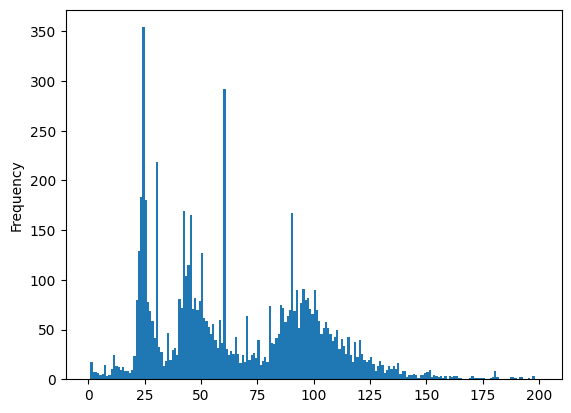

In [32]:
df.runtime.plot(kind='hist', bins=200, range=(0, 200))

**2.5 What is the number of votes a movie needs to have, to be in the top 10% most voted film?**

*Tip: the 90th quantile*

In [34]:
df.votes.quantile(0.9)

np.float64(22193.100000000035)

## 3. Merging datasets (4 points)

**Read `movies_metadata.csv` and assign it to a `df_meta` variable**

**Create a `merge_df` DataFrame from an `inner join` between `df` and `df_meta`**

*Hint: you need to find the right key to join on*

In [36]:
df_meta = pd.read_csv('data/movies_metadata.csv')

C:\Users\peter\AppData\Local\Temp\ipykernel_18124\3960015751.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta = pd.read_csv('data/movies_metadata.csv')


In [55]:
pd.set_option('display.max_columns', None)
df_meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [58]:
merge_df = pd.merge(df, df_meta, left_on='movies', right_on='title')

In [59]:
merge_df

,movies,year,genre,rating,one-line,stars,votes,runtime_x,gross,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime_y,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805.0,44.0,NaN,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",NaN,95963,tt0114888,en,The Walking Dead,Five young marines on a suicide mission in Vie...,0.620873,/lP0YJPbtshhFHGVSgiQojuiC1im.jpg,"[{'name': 'Savoy Pictures', 'id': 11308}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-24,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Surviving the streets was just a rehearsal.,The Walking Dead,False,6.6,4.0
1,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805.0,44.0,NaN,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 27, 'name...",NaN,27115,tt0028478,en,The Walking Dead,A gang of racketeers frames down-on-his-luck J...,1.057723,/iqPdo0MyVItCmBc5pH5dAn1LCYp.jpg,"[{'name': 'Warner Bros.', 'id': 6194}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1936-03-14,0.0,66.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,HE DIED a man with a hunger to love... and ret...,The Walking Dead,False,6.6,14.0
2,Lucifer,(2016–2021),"\nCrime, Drama, Fantasy",8.1,\nLucifer Morningstar has decided he's had eno...,"\n \n Stars:\nTom Ellis, \nLesle...",264222.0,42.0,NaN,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",http://www.luciferthefilm.com/,299001,tt4131206,es,Lucifer,"On his downfall from Heaven to Hell, Lucifer p...",0.440012,/lRvYnqwrhlzClxwOZLTPGjxN7zP.jpg,"[{'name': 'Minds Meet', 'id': 12583}]","[{'iso_3166_1': 'MX', 'name': 'Mexico'}, {'iso...",2014-10-22,0.0,108.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,Lucifer,False,5.8,4.0
3,The Good Doctor,(2017– ),\nDrama,8.1,"\nShaun Murphy, a young surgeon with autism an...","\n \n Stars:\nFreddie Highmore, ...",70871.0,41.0,NaN,False,NaN,6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,65650,tt1582271,en,The Good Doctor,"Dr. Martin Blake, who has spent his life looki...",8.278079,/qAkb7Rm9dMVz3wJuSXmj0wiJTd7.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2011-01-01,5206.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Do no harm.,The Good Doctor,False,5.0,52.0
4,Supernatural,(2005–2020),"\nDrama, Fantasy, Horror",8.4,\nTwo brothers follow their father's footsteps...,"\n \n Stars:\nJared Padalecki, \...",404273.0,44.0,NaN,False,NaN,0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",NaN,109841,tt0024631,en,Supernatural,In the course of a seance meant to contact her...,1.023885,/1saQ4r3wjtDjPxQrDWYHMloDXDy.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1933-05-12,0.0,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Supernatural,False,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741,Connected,Unknown,\nDocumentary,7.1,\nExploring the intricate and surprising conne...,\n \n Star:\nLatif Nasser\n,NaN,NaN,NaN,False,NaN,5750000,"[{'id': 53, 'name': 'Thriller'}]",NaN,19611,tt1156506,cn,Bo chi tung wah,A debt collector receives a call from a woman ...,2.989962,/gCAhDJ96XFV5NmwlHo90BTObzYW.jpg,"[{'name': 'Emperor Motion Pictures', 'id': 272...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",2008-09-25,0.0,110.0,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}, {'i...",Released,NaN,Connected,False,7.0,20.0
1742,How to Win the US Presidency,(2016),\nDocumentary,6.2,\nThis whimsical look at rough-and-tumble Amer...,\n Director:\nCal Seville\n| \n S